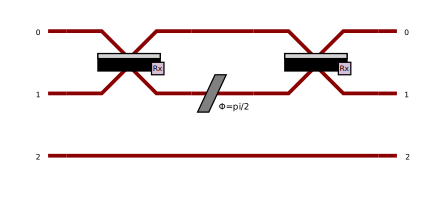

In [1]:
from scipy.special import comb
from feature_map import feature_map_circuit, feature_map_quantum_state
import numpy as np
import perceval as pcvl
from perceval import BS, PS

m = 3
n = 1
postselect = n
samples = 100
circuit = pcvl.Circuit(m)  # Create an empty 3 mode circuit
circuit.add(0, BS())
circuit.add(1, PS(phi=pcvl.P('phi')))
circuit.add(0, BS())
params=circuit.get_parameters()
params[0].set_value(np.pi/2)
pcvl.pdisplay(circuit)

In [3]:
proc = pcvl.Processor("SLOS", m)
proc.set_circuit(circuit)
proc.min_detected_photons_filter(postselect)
proc.thresholded_output(True)
input_state_list = [1]+[0]+[0]
proc.with_input(pcvl.BasicState(input_state_list))
sampler = pcvl.algorithm.Sampler(proc, max_shots_per_call=samples)
res = sampler.probs(samples)
distribution = res["results"]
print(distribution)
print(feature_map_quantum_state(distribution, (int)(comb(m,n))))

{
  |1,0,0>: 0.4999999999999999
  |0,1,0>: 0.5000000000000001
}
tensor([0.5000, 0.5000, 0.0000], dtype=torch.float64)
